<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/2348558_RL_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demonstrate the concept of bootstrapping in reinforcement learning. Use a simple grid-world example to show how an agent updates its state-value estimates by combining sampled rewards with estimated future values.


**Importing Necessary Libraries**

In [8]:
import matplotlib.pyplot as plt
import numpy as np

### **Step 1: Define the Grid-World Environment**

In [9]:
class GridWorld:
  def __init__(self, size=(4, 4)):
    self.size = size
    self.goal_state = (3, 3)
    self.start_state = (0, 0)
    self.current_state = self.start_state

  def reset(self):
    """Reset the environment to the initial state."""
    self.current_state = self.start_state
    return self.current_state

  def step(self, action):
    """Take an action and return the next state, reward, and done flag."""
    x, y = self.current_state

    if action == 0:
        x = max(x - 1, 0)
    elif action == 1:
        x = min(x + 1, self.size[0] - 1)
    elif action == 2:
        y = max(y - 1, 0)
    elif action == 3:
        y = min(y + 1, self.size[1] - 1)

    next_state = (x, y)
    reward = -1
    done = False

    if next_state == self.goal_state:
        reward = 1
        done = True

    self.current_state = next_state
    return next_state, reward, done

  def visualize(self, agent_path=None, title="Grid World"):
    """Visualize the grid world with the agent's path and goal state."""
    grid = np.zeros(self.size)
    goal_x, goal_y = self.goal_state
    grid[goal_x, goal_y] = 1

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(grid, cmap='Blues', origin='upper', extent=(0, self.size[1], 0, self.size[0]))

    ax.set_xticks(np.arange(0, self.size[1] + 1, 1))
    ax.set_yticks(np.arange(0, self.size[0] + 1, 1))
    ax.grid(True, which='both', color='black', linewidth=1)

    if agent_path:
        for state in agent_path:
            ax.plot(state[1] + 0.5, state[0] + 0.5, 'ro')

    ax.plot(goal_y + 0.5, goal_x + 0.5, 'go', markersize=10)

    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

### **Step 2: Temporal Difference (TD) Learning with Bootstrapping**

In [10]:
class Agent:
  def __init__(self, grid_world, alpha=0.1, gamma=0.9):
    self.grid_world = grid_world
    self.alpha = alpha
    self.gamma = gamma
    self.V = np.zeros(grid_world.size)
    self.actions = [0, 1, 2, 3]
    self.action_counts = np.zeros(len(self.actions))
    self.total_rewards = []

  def choose_action(self, state):
    """Random action selection for simplicity."""
    action = np.random.choice(self.actions)
    self.action_counts[action] += 1
    return action

  def update_value(self, state, reward, next_state):
    """Update state-value function using TD(0) formula."""
    current_value = self.V[state]
    next_value = self.V[next_state]
    td_target = reward + self.gamma * next_value
    td_error = td_target - current_value
    self.V[state] += self.alpha * td_error

  def learn(self, episodes=100):
    """Train the agent by running through episodes."""
    for episode in range(episodes):
      state = self.grid_world.reset()
      agent_path = [state]
      total_reward = 0
      done = False

      while not done:
        action = self.choose_action(state)
        next_state, reward, done = self.grid_world.step(action)
        self.update_value(state, reward, next_state)
        agent_path.append(next_state)
        total_reward += reward
        state = next_state

      self.total_rewards.append(total_reward)

      if episode % 10 == 0:
          self.grid_world.visualize(agent_path, title=f"Episode {episode}")

      if episode % 10 == 0:
          print(f"State-values after episode {episode}:\n{self.V}")

      if episode % 10 == 0:
          plot_value_function(self.V, episode)

  def plot_learning_curve(self):
    """Plot the learning curve showing total reward per episode."""
    plt.plot(self.total_rewards)
    plt.title("Learning Curve: Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

  def plot_action_distribution(self):
    """Plot the distribution of actions taken by the agent."""
    plt.bar(range(len(self.actions)), self.action_counts)
    plt.title("Action Distribution")
    plt.xlabel("Action")
    plt.ylabel("Frequency")
    plt.xticks(range(len(self.actions)), ["Up", "Down", "Left", "Right"])
    plt.show()

  def plot_value_function(V, episode):
    """Plot the state-value function as a heatmap."""
    fig, ax = plt.subplots(figsize=(6, 6))

    cax = ax.imshow(V, cmap='viridis', origin='upper', extent=(0, V.shape[1], 0, V.shape[0]))

    ax.set_xticks(np.arange(0, V.shape[1] + 1, 1))
    ax.set_yticks(np.arange(0, V.shape[0] + 1, 1))
    ax.grid(True, which='both', color='black', linewidth=1)

    plt.gca().invert_yaxis()
    plt.title(f"State-Value Function Heatmap - Episode {episode}")

    plt.colorbar(cax, label="State-Value")

    plt.show()


### **Step 3: Training and Observing Bootstrapping in Action**

In [11]:
def plot_value_function(V, episode):
    """Plot the state-value function as a heatmap."""
    fig, ax = plt.subplots(figsize=(6, 6))

    cax = ax.imshow(V, cmap='viridis', origin='upper', extent=(0, V.shape[1], 0, V.shape[0]))

    ax.set_xticks(np.arange(0, V.shape[1] + 1, 1))
    ax.set_yticks(np.arange(0, V.shape[0] + 1, 1))
    ax.grid(True, which='both', color='black', linewidth=1)

    plt.gca().invert_yaxis()
    plt.title(f"State-Value Function Heatmap - Episode {episode}")

    plt.colorbar(cax, label="State-Value")

    plt.show()

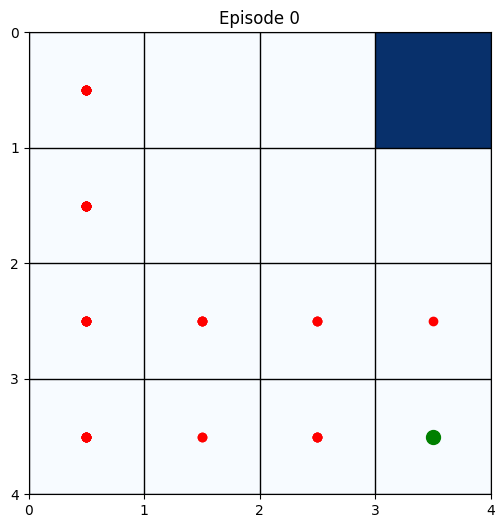

State-values after episode 0:
[[-1.00660215  0.          0.          0.        ]
 [-1.04025421  0.          0.          0.        ]
 [-0.66028673 -0.370558   -0.27829     0.1       ]
 [-0.75082484 -0.2152729  -0.376309    0.        ]]


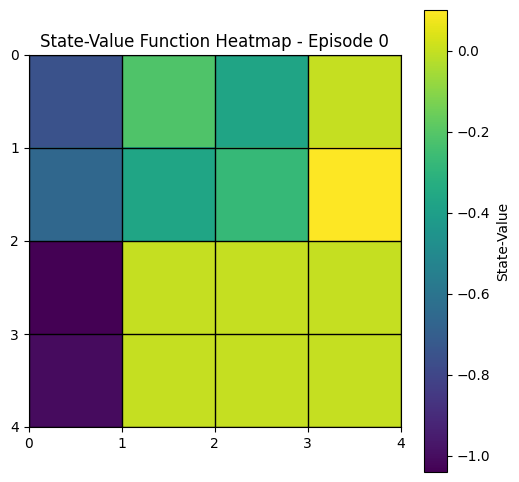

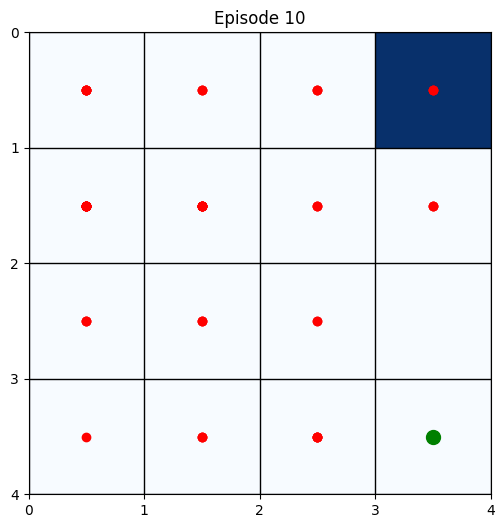

State-values after episode 10:
[[-4.7396267  -4.34953868 -3.57382551 -3.31472797]
 [-4.71135101 -4.42451109 -3.6562396  -3.19221446]
 [-4.27059609 -3.90043868 -3.15568872 -2.03298685]
 [-3.66835699 -3.40275875 -2.49010714  0.        ]]


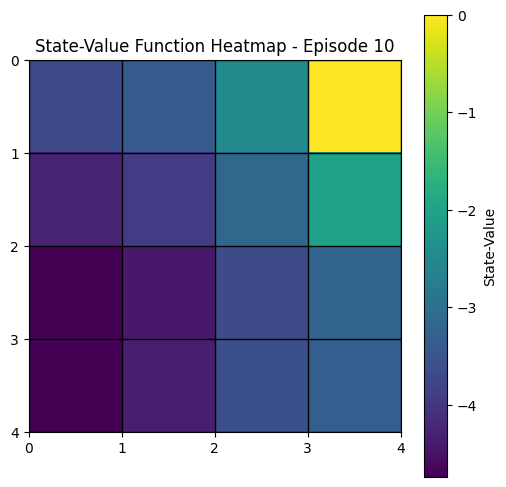

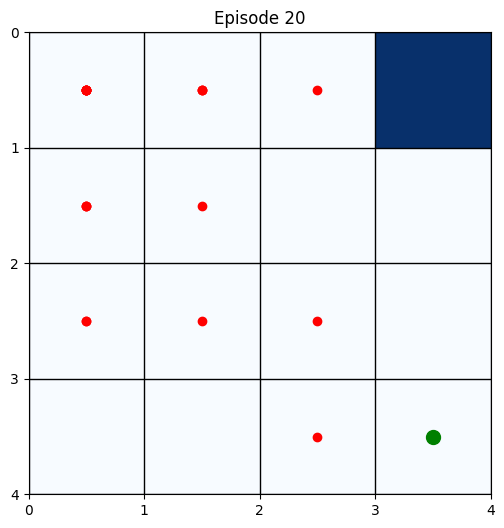

State-values after episode 20:
[[-6.88546783 -6.54410271 -5.69338034 -5.5361693 ]
 [-6.89341073 -6.63488292 -5.38275354 -5.06535864]
 [-6.8397372  -6.22638842 -4.87980005 -2.74755356]
 [-6.63951035 -6.28305671 -2.46000572  0.        ]]


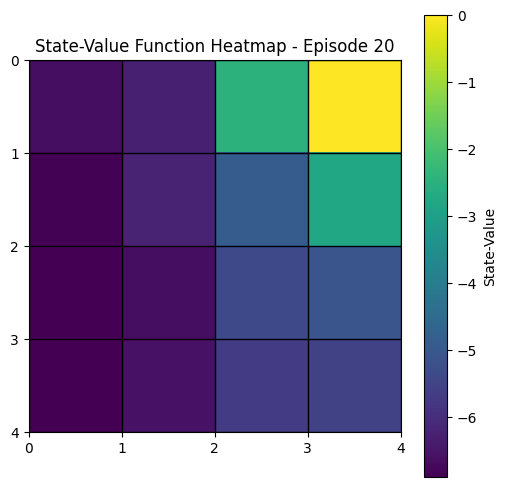

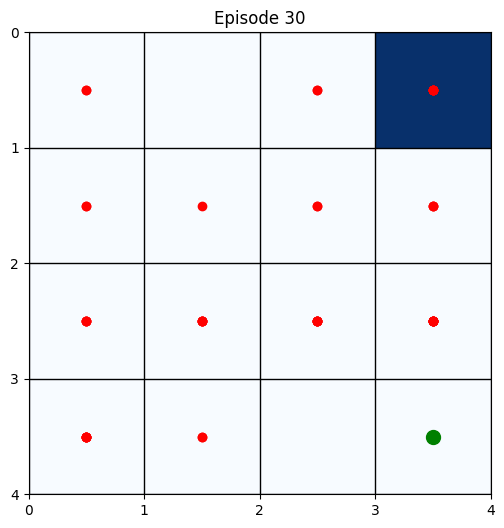

State-values after episode 30:
[[-7.7500909  -7.26149359 -6.75603953 -6.38050339]
 [-7.56547182 -7.01066137 -6.28194127 -5.31804984]
 [-7.37437595 -6.68868565 -5.58721687 -3.72034401]
 [-7.4833835  -6.52369481 -3.2926538   0.        ]]


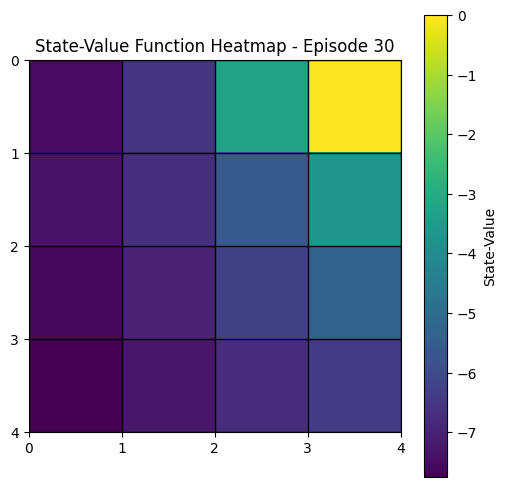

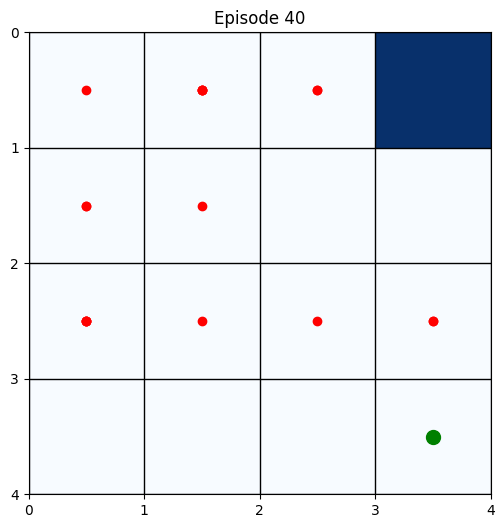

State-values after episode 40:
[[-8.38089561 -8.15422791 -7.53428808 -7.14949001]
 [-8.26199004 -7.85875686 -6.73228012 -6.66583084]
 [-8.02172245 -7.04730471 -5.27505581 -3.58678582]
 [-7.86057161 -6.93299456 -3.95581002  0.        ]]


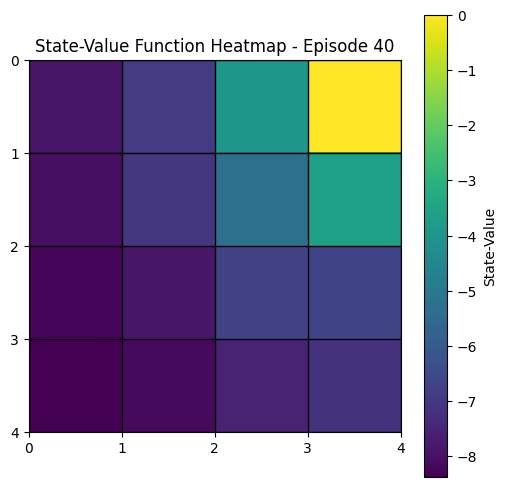

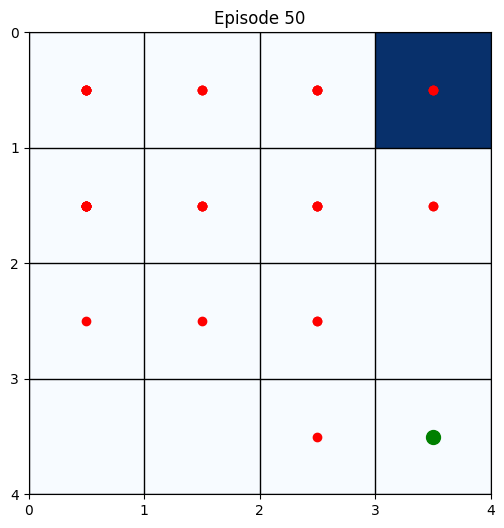

State-values after episode 50:
[[-8.55308624 -8.27559385 -7.69835435 -7.13142427]
 [-8.44562717 -8.1026414  -7.25526589 -6.41637665]
 [-8.20480464 -7.35971278 -5.72120413 -4.40255332]
 [-7.81222437 -6.6482181  -2.95446735  0.        ]]


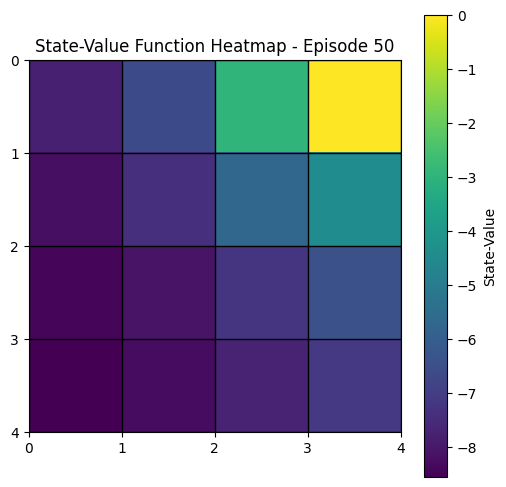

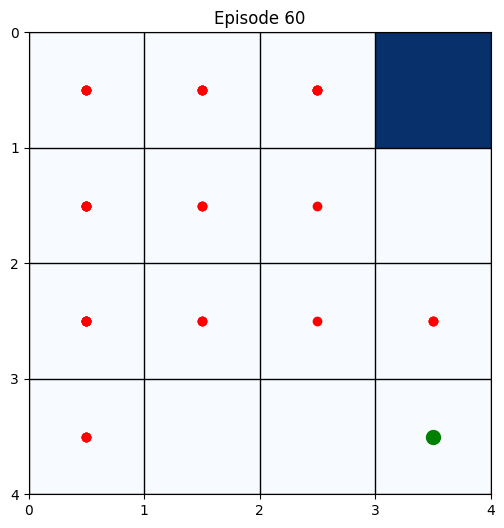

State-values after episode 60:
[[-8.87159787 -8.55286579 -8.20700208 -8.01676186]
 [-8.63101086 -8.22759217 -7.58673876 -6.79587719]
 [-8.28772636 -7.62054007 -5.80478609 -4.27618802]
 [-8.09211804 -6.45218351 -3.068359    0.        ]]


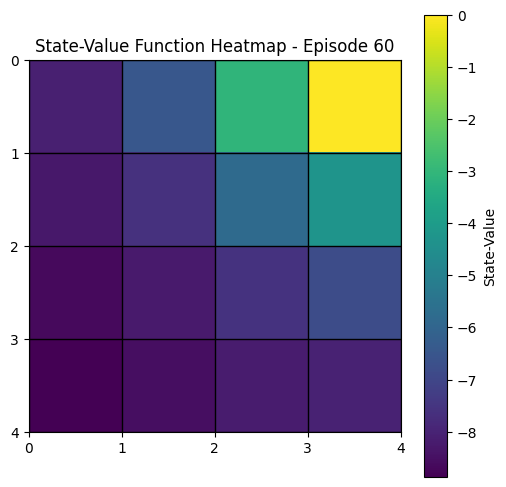

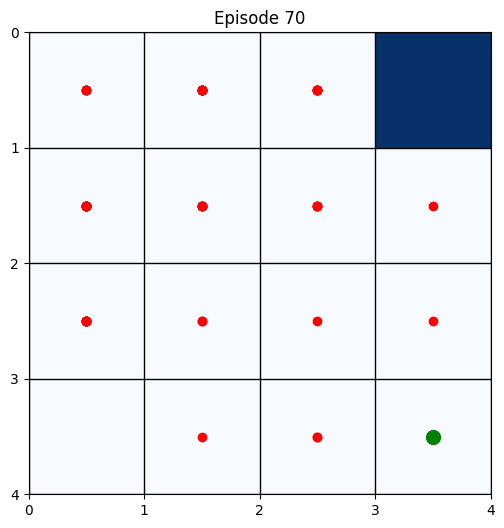

State-values after episode 70:
[[-8.97903457 -8.82676676 -8.67220196 -8.54394867]
 [-8.89478644 -8.64586187 -8.31620539 -7.86991478]
 [-8.66870581 -7.94461819 -6.90162172 -4.76463881]
 [-8.46732722 -7.57001202 -2.86388753  0.        ]]


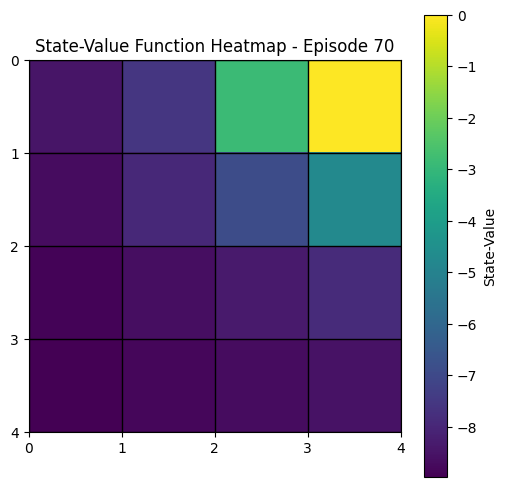

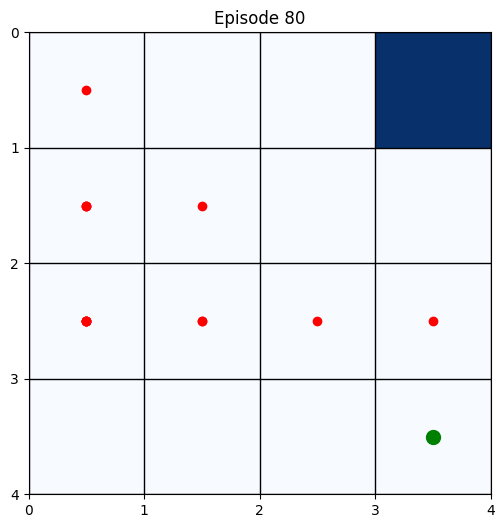

State-values after episode 80:
[[-9.19285909 -9.01037386 -8.9088947  -8.48900851]
 [-8.99982696 -8.73243752 -8.0026104  -7.07335321]
 [-8.71853005 -7.9258089  -6.45489772 -2.33122749]
 [-8.48093788 -6.9498399  -3.50399608  0.        ]]


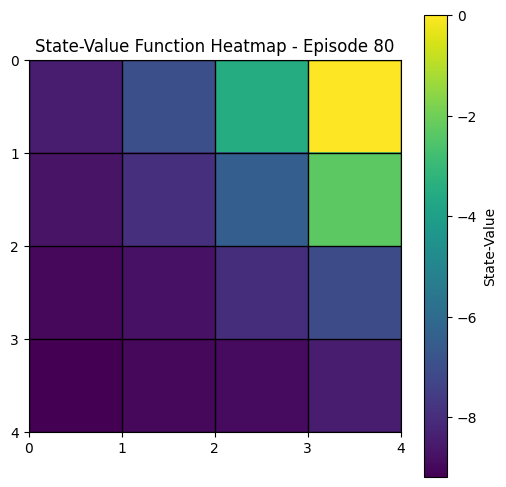

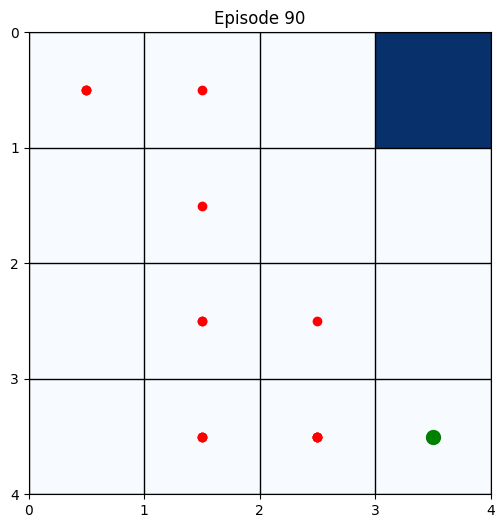

State-values after episode 90:
[[-9.20452952 -9.01046457 -8.7276316  -8.14493411]
 [-8.99591147 -8.62824213 -7.78991376 -6.8524906 ]
 [-8.55740791 -7.54903718 -5.77174837 -3.45990688]
 [-8.38686125 -6.89396977 -2.79462429  0.        ]]


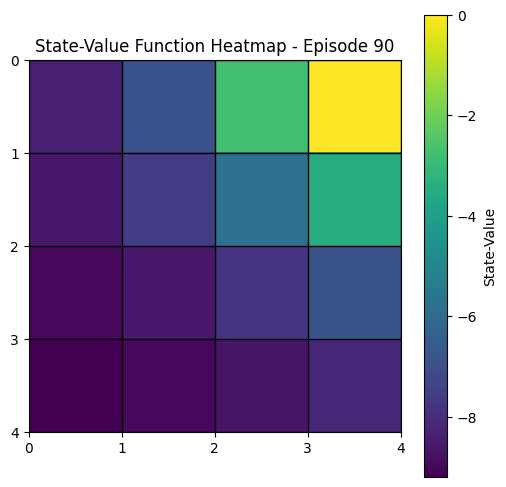

In [12]:
grid_world = GridWorld(size=(4, 4))
agent = Agent(grid_world)
agent.learn(episodes=100)

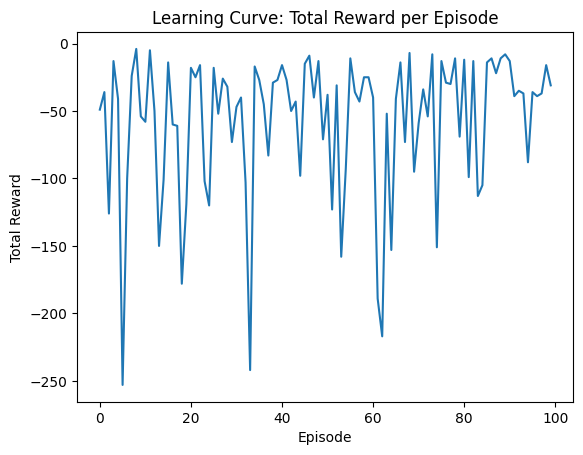

In [13]:
agent.plot_learning_curve()

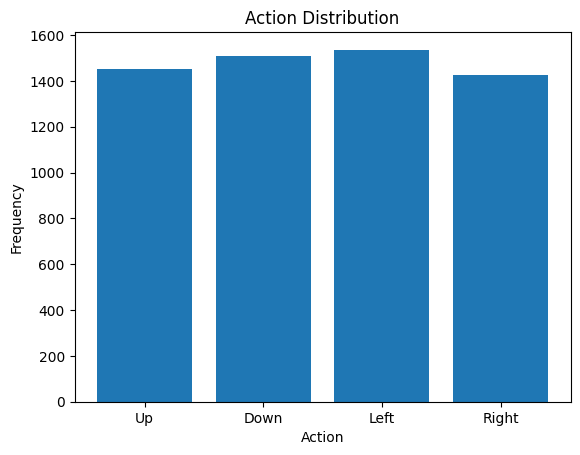

In [14]:
agent.plot_action_distribution()

### **Step 4: Final Visualization of the State-Value Function**

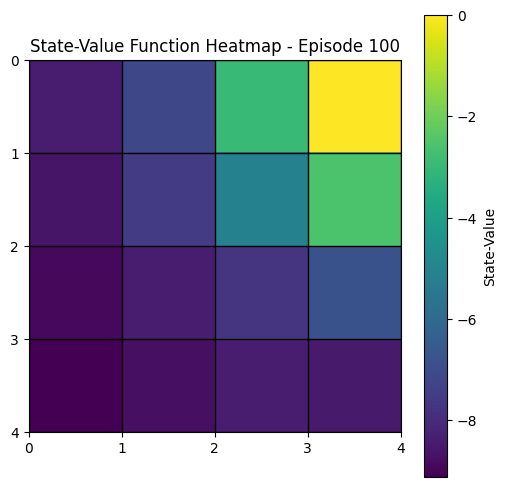

In [15]:
plot_value_function(agent.V,100)

### **Conclusion**

The output of the state-value function \( V(s) \) of the agent after some episodes of learning in the grid-world environment.

1. **State-Value Function Interpretation**:
   - The state-value function indicates the **expected return** (sum of future rewards) from each state, starting from that state and following the current policy. In this case, the agent uses a **bootstrapping** method (Temporal Difference learning, TD(0)) to update its state-value estimates.
   - The **goal state** (located at (3, 3)) has a value of `0.0`, as it's a terminal state where the agent receives a reward of 1 when it reaches it, but no further rewards are gained after reaching the goal.
   - The **negative values** for the other states reflect the **penalty** the agent incurs for each step it takes while trying to reach the goal. These penalties are due to the agent’s policy of moving around the grid, and the values represent the agent’s belief of how much future reward it will accumulate from those states.

2. **Learning Progress**:
   - As the agent learns over multiple episodes, the state-value function gradually improves, with values closer to the goal state increasing (becoming less negative or approaching zero).
   - The **negative values** show that the agent is still far from its goal in most of the grid, and it is not yet fully optimized in terms of its policy or value function. The agent has not yet learned to preferentially take the most direct path to the goal, but the values are slowly converging as it learns.
   - The agent’s learning process uses **bootstrapping**, where it combines immediate rewards with expected future rewards from neighboring states. This iterative updating refines the value estimates, making the agent’s decisions more informed with each new episode.